In [1]:
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO
import pandas as pd
from pathlib import Path
import seaborn as sns
from ccb.experiment import parse_results
from ccb.experiment.retrieve_runs import retrieve_runs

%load_ext autoreload
%autoreload 2

# Main Restults

['resnet18' 'swinv2_tiny_window16_256' 'vit_small_patch16_224' 'resnet50'
 'conv4' 'millionaid_resnet50' 'moco_resnet50' 'moco_resnet18'
 'vit_tiny_patch16_224' 'convnext_base' 'scratch_resnet18']


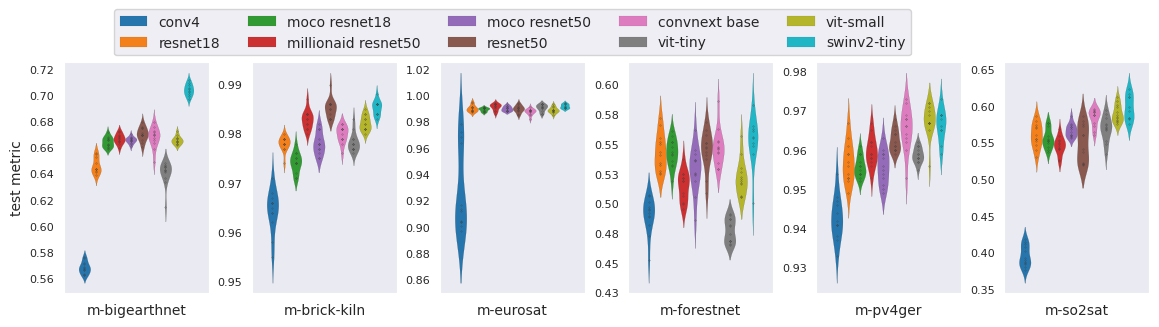

In [14]:
classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'

df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=False)

print(df.model.unique())

# df['train_ratio'] = [get_train_ratio(part_name) for part_name in df['partition_name']]
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

model_order = "conv4,resnet18,moco resnet18,millionaid resnet50,moco resnet50,resnet50,convnext base,vit-tiny,vit-small,swinv2-tiny".split(",")
df_1x = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()
# df_1x = df[(df["partition name"] == "0.05x train")].copy()

normalizer = parse_results.make_normalizer(df_1x)
normalizer.normalize_data_frame(df_1x, ["test metric", "val metric"])

parse_results.plot_per_dataset_3(df_1x, model_order, metric="test metric", sharey=False, inner="points", fig_size=(14,3), n_legend_rows=2)
plt.savefig(Path.home() / "figures" / "test metric.pdf", bbox_inches="tight", dpi=300)
# parse_results.plot_per_dataset_3(df_1x, model_order, metric="val metric", sharey=False, inner="points")
# plt.savefig(Path.home() / "figures" / "test metric.png", bbox_inches="tight", dpi=300)

# parse_results.plot_per_dataset_3(df_1x, model_order, metric="test loss", sharey=False, inner="points")
# parse_results.plot_per_dataset_3(df_1x, model_order, metric="val loss", sharey=False, inner="points")


Index(['model', 'partition name', 'normalized test metric', 'dataset'], dtype='object')


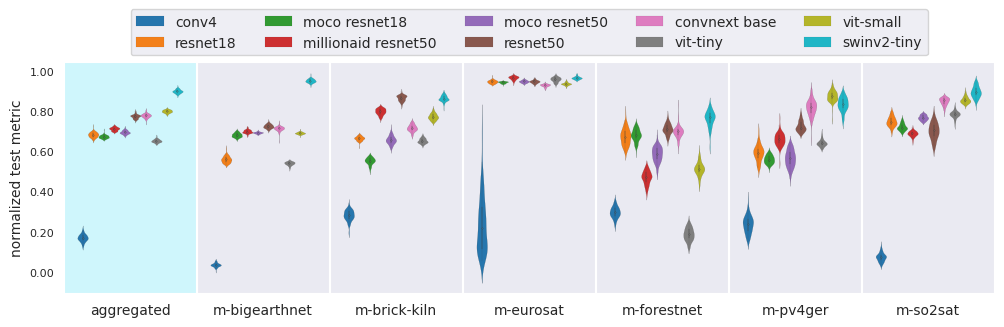

In [15]:
parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized test metric", model_order=model_order, fig_size=(12,3))
# parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized val_metric", model_order=model_order)
plt.savefig(Path.home() / "figures" / "normalized test metric.pdf", bbox_inches="tight", dpi=300)

# Growing Train Size


['resnet18' 'swinv2-tiny' 'vit-small' 'resnet50' 'conv4'
 'millionaid resnet50' 'moco resnet50' 'moco resnet18' 'vit-tiny'
 'convnext base' 'scratch resnet18']
bootstrapping with repeat=50.


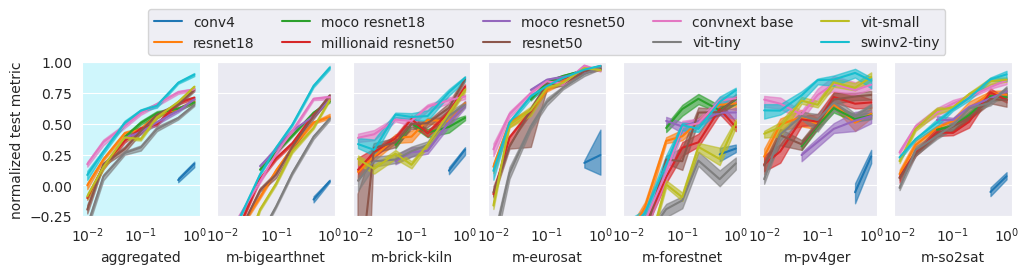

In [18]:
classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=False)

df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

# model_order = "conv4,resnet18,ssl moco resnet18,millionaid resnet50,ssl moco resnet50,resnet50,convnext base,vit-tiny,vit-small,swinv2-tiny".split(",")
df_1x = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()
# df_1x = df[(df["partition name"] == "0.05x train")].copy()

normalizer = parse_results.make_normalizer(df_1x)
normalizer.normalize_data_frame(df, ["test metric", "val metric"])

parse_results.plot_bootstrap_aggregate_growing(df, metric="normalized test metric", fig_size=(12,2))
# plt.savefig(Path.home() / "figures" / "test metric.pdf", bbox_inches="tight", dpi=300)

# Train Size Analysis

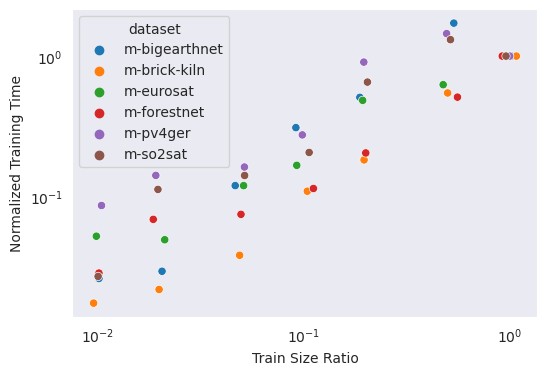

In [19]:
classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=False)
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

plt.figure(figsize=(6,4), dpi=100)
parse_results.plot_normalized_time(df, average_seeds=True, reference_ratio=1.0)
# plt.savefig(Path.home() / "figures" / "training time.png", bbox_inches="tight")


m-forestnet
m-bigearthnet
m-so2sat
m-brick-kiln
m-eurosat
m-pv4ger


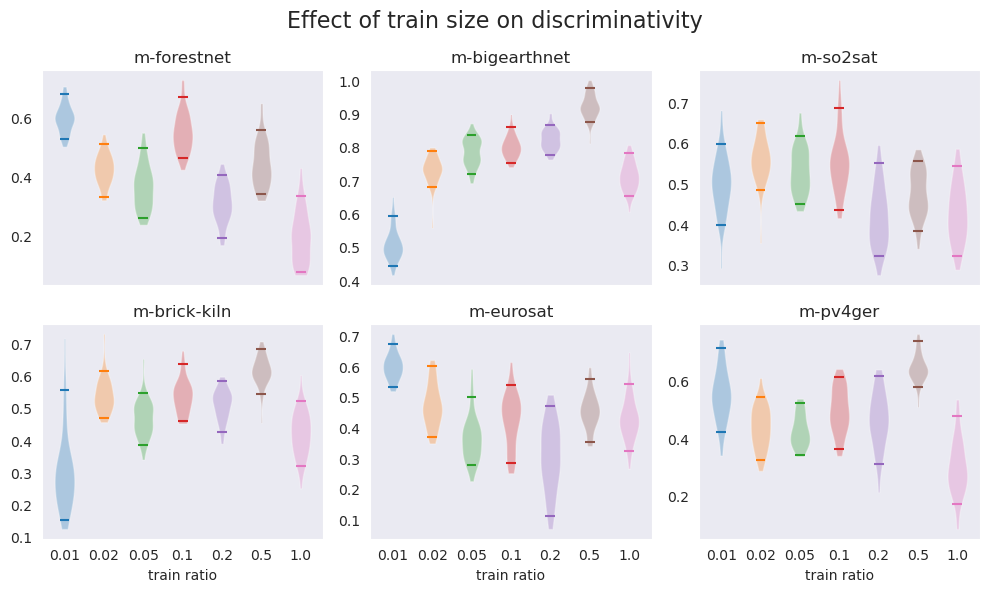

In [23]:
df_filtered = df[~df.model.isin(("conv4", "moco resnet18", "moco resnet50", "scratch resnet18"))]

parse_results.plot_discriminative_metric(df_filtered, metric="val metric", n_largest=100, fig_size=(10,6))
plt.savefig(Path.home() / "figures" / "discriminativity.png", bbox_inches="tight")


In [21]:
parse_results.count_exp(df)

model                         conv4  convnext base  millionaid resnet50  \
dataset       partition name                                              
m-bigearthnet 0.01x train       NaN           12.0                 12.0   
              0.02x train       NaN           12.0                 12.0   
              0.05x train       NaN           12.0                 12.0   
              0.10x train       NaN           12.0                 12.0   
              0.20x train       NaN           12.0                 12.0   
              0.50x train      12.0           12.0                 12.0   
              1.00x train      12.0           12.0                 12.0   
m-brick-kiln  0.01x train       NaN           12.0                 12.0   
              0.02x train       NaN           12.0                 12.0   
              0.05x train       NaN           12.0                 12.0   
              0.10x train       NaN           12.0                 12.0   
              0.20x train       NaN           12.0                 12.0   
              0.50x train      12.0           12.0                 12.0   
              1.00x train      12.0           12.0                 12.0   
m-eurosat     0.01x train       NaN           12.0                 12.0   
              0.02x train       NaN           12.0                 12.0   
              0.05x train       NaN           12.0                 12.0   
              0.10x train       NaN           12.0                 12.0   
              0.20x train       NaN           12.0                 12.0   
              0.50x train      12.0           12.0                 12.0   
              1.00x train      12.0           12.0                 12.0   
m-forestnet   0.01x train       NaN           12.0                 12.0   
              0.02x train       NaN           12.0                 12.0   
              0.05x train       NaN           12.0                 12.0   
              0.10x train       NaN           12.0                 12.0   
              0.20x train       NaN           12.0                 12.0   
              0.50x train      12.0           12.0                 12.0   
              1.00x train      12.0           12.0                 12.0   
m-pv4ger      0.01x train       NaN           12.0                 12.0   
              0.02x train       NaN           12.0                 12.0   
              0.05x train       NaN           12.0                 12.0   
              0.10x train       NaN           12.0                 12.0   
              0.20x train       NaN           12.0                 12.0   
              0.50x train      12.0           12.0                 12.0   
              1.00x train      12.0           12.0                 12.0   
m-so2sat      0.01x train       NaN           12.0                 12.0   
              0.02x train       NaN           12.0                 12.0   
              0.05x train       NaN           12.0                 12.0   
              0.10x train       NaN           12.0                 12.0   
              0.20x train       NaN           12.0                 12.0   
              0.50x train      12.0           12.0                 12.0   
              1.00x train      12.0           12.0                 12.0   

model                         moco resnet18  moco resnet50  resnet18  \
dataset       partition name                                           
m-bigearthnet 0.01x train               NaN            NaN      11.0   
              0.02x train               NaN            NaN      12.0   
              0.05x train              12.0           12.0      12.0   
              0.10x train              12.0           12.0      12.0   
              0.20x train              12.0           12.0      12.0   
              0.50x train              12.0           11.0      12.0   
              1.00x train              12.0           12.0      10.0   
m-brick-kiln  0.01x train               NaN        